# CH08_5_Generating Convolution Neural Network using Keras 

- Last upadate : 2022.04.13.

In [87]:
# Training Convolution Neural Network
# 1. Loading Dataset

(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 2. Spliting Training Dataset into training set and verifying set

from sklearn.model_selection import train_test_split 

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

# 3. Transforming target into one-hot incoding
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

# 4. Preparing input data
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

x_train.shape

# 5. Standardization Preprocessing for Input data 
x_train = x_train / 255
x_val = x_val /255

## # Generating Convolution Neural Network using Keras

In [88]:
# 1. Importing required classes

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [89]:
# 2. Stacking Convolution layers 

conv1 = tf.keras.Sequential()
print (">>> conv1 =", conv1)
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
print (">>> conv1 =", conv1)

>>> conv1 = <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001F12A204D08>
>>> conv1 = <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001F12A204D08>


In [90]:
# 3. Stacking pooling layers 

conv1.add(MaxPooling2D((2, 2)))
print (">>> conv1 =", conv1)

>>> conv1 = <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001F12A204D08>


In [91]:
# 4. Flatting feature map to insert in fully connected layer

conv1.add(Flatten( ))
print (">>> conv1 =", conv1)

>>> conv1 = <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001F12A204D08>


In [92]:
# 5. Stacking fullly conntected layers 

conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [93]:
# 6. Observing the Model Structure 
conv1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               196100    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


## # Training Convolution Neural Network 

In [94]:
# 1. Model compling and Training 

conv1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [95]:
# 2. Applying Adaptive Movement Estimation(ADAM) Optimzier 

history = conv1.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4490 - accuracy: 0.8419 - val_loss: 0.3494 - val_accuracy: 0.8792
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3134 - accuracy: 0.8872 - val_loss: 0.3134 - val_accuracy: 0.8862
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2691 - accuracy: 0.9007 - val_loss: 0.2758 - val_accuracy: 0.9041
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2379 - accuracy: 0.9130 - val_loss: 0.2689 - val_accuracy: 0.9043
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2119 - accuracy: 0.9221 - val_loss: 0.2708 - val_accuracy: 0.9066
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1904 - accuracy: 0.9293 - val_loss: 0.2428 - val_accuracy: 0.9173
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1713 - accuracy: 0.9371 - val_loss: 0.2489 - val_accuracy:

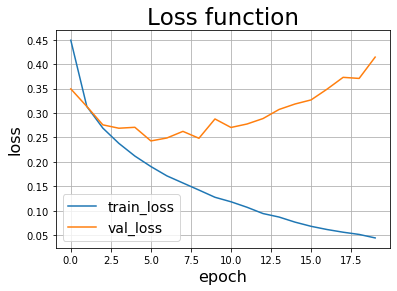

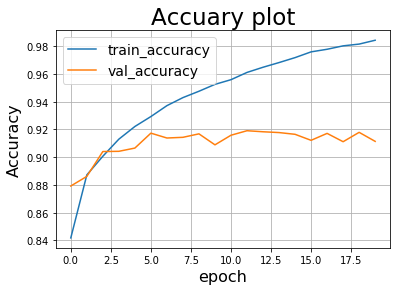

In [96]:
# 3. Checking out loss graph and accuracy graph
# 3.1. loss graph

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss', fontsize='16')
plt.xlabel('epoch', fontsize='16')
plt.title('Loss function', fontsize='23')
plt.legend(['train_loss', 'val_loss'], fontsize='14')

plt.grid()
plt.show()


# 3.2. Accuracy graph 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy', fontsize ='16')
plt.xlabel('epoch', fontsize ='16')
plt.title('Accuary plot', fontsize ='23')
plt.legend(['train_accuracy', 'val_accuracy'], fontsize='14')

plt.grid()
plt.show()

## # What is Dropout? 

In [97]:
# 1. Applying dropout in Convolution Neural Network made of Keras 

from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))

conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [98]:
# 2. Checking out Dropout layer 

conv2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1960)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               196100    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_______________________________________________

In [99]:
# 3. Training 

conv2.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics= ['accuracy'])
history = conv2.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5242 - accuracy: 0.8109 - val_loss: 0.3517 - val_accuracy: 0.8752
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3823 - accuracy: 0.8628 - val_loss: 0.3115 - val_accuracy: 0.8887
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3412 - accuracy: 0.8761 - val_loss: 0.2841 - val_accuracy: 0.8972
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3135 - accuracy: 0.8839 - val_loss: 0.2837 - val_accuracy: 0.8961
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2949 - accuracy: 0.8914 - val_loss: 0.2549 - val_accuracy: 0.9076
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2785 - accuracy: 0.8970 - val_loss: 0.2573 - val_accuracy: 0.9064
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2613 - accuracy: 0.9029 - val_loss: 0.2415 - val_accuracy:

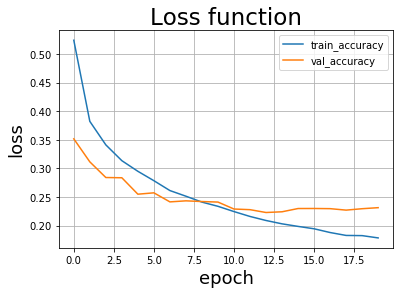

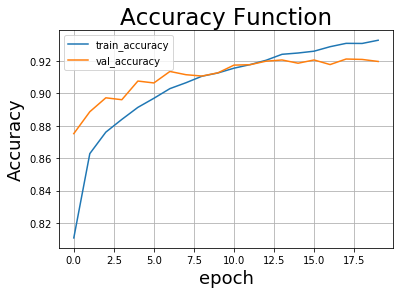

In [100]:
# 4. Plotting loss graph and accuracy graph 
# 4.1. Plotting loss graph 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss', fontsize ='18')
plt.xlabel('epoch', fontsize ='18')
plt.title('Loss function', fontsize ='23')
plt.legend(['train_accuracy', 'val_accuracy'])

plt.grid()
plt.show()

# 4.2. plotting accuracy graph 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy', fontsize ='18')
plt.xlabel('epoch', fontsize ='18')
plt.title('Accuracy plot', fontsize ='23')
plt.legend(['train_accuracy', 'val_accuracy'])

plt.grid()
plt.show()